In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd
pd.set_option('display.max_columns', 999)

## Data

Data from: https://covidtracking.com

Field descriptions:

* checkTimeEt
    * Field type: string
    * Deprecated

* commercialScore
    * Field type: integer
    * Deprecated
    * Returns null if no data is available

* dataQualityGrade
    * Field type: string
    * Grade assigned to the state based on the quality of their data reporting.

* date
    * Field type: integer
    * Date for which the daily totals were collected.

* dateChecked
    * Field type: string
    * Deprecated

* dateModified
    * Field type: string
    * Deprecated, use lastUpdateEt instead

* death
    * Field type: integer
    * Total number of people who have died as a result of COVID-19 so far.
    * Returns null if no data is available

* deathIncrease
    * Field type: integer
    * Daily difference in death
    * Returns null if no data is available

* fips
    * Field type: string
    * Census FIPS code for the state.

* grade
    * Field type: string
    * Deprecated

* hash
    * Field type: string
    * Deprecated - A hash of the current record.

* hospitalized
    * Field type: integer
    * Deprecated
    * Returns null if no data is available

* hospitalizedCumulative
    * Field type: integer
    * Total number of people who have gone to the hospital for COVID-19 so far, including those who have since recovered or died.
    * Returns null if no data is available

* hospitalizedCurrently
    * Field type: integer
    * Number of people in hospital for COVID-19 on this day.
    * Returns null if no data is available

* hospitalizedIncrease
    * Field type: integer
    * Daily difference in hospitalized
    * Returns null if no data is available

* inIcuCumulative
    * Field type: integer
    * Total number of people who have gone to the ICU for COVID-19 so far, including those who have since recovered or died.
    * Returns null if no data is available

* inIcuCurrently
    * Field type: integer
    * Total number of people in the ICU for COVID-19 on this day.
    * Returns null if no data is available

* lastUpdateEt
    * Field type: string
    * Last time the day's data was updated.

* negative
    * Field type: integer
    * Total number of people who have tested negative for COVID-19 so far.
    * Returns null if no data is available

* negativeIncrease
    * Field type: integer
    * Deprecated
    * Returns null if no data is available

* negativeRegularScore
    * Field type: integer
    * Deprecated
    * Returns null if no data is available

* negativeScore
    * Field type: integer
    * Deprecated
    * Returns null if no data is available

* negativeTestsViral
    * Field type: integer
    * Total number of negative PCR tests.
    * Returns null if no data is available

* onVentilatorCumulative
    * Field type: integer
    * Total number of people who have used a ventilator for COVID-19 so far, including those who have since recovered or died.
    * Returns null if no data is available

* onVentilatorCurrently
    * Field type: integer
    * Number of people using a ventilator for COVID-19 on this day.
    * Returns null if no data is available

* pending
    * Field type: integer
    * Number of tests whose results have yet to be determined.
    * Returns null if no data is available

* posNeg
    * Field type: integer
    * Deprecated
    * Returns null if no data is available

* positive
    * Field type: integer
    * Total number of people who have tested positive for COVID-19 so far.
    * Returns null if no data is available

* positiveCasesViral
    * Field type: integer
    * Total number of positive cases measured with PCR tests.
    * Returns null if no data is available

* positiveIncrease
    * Field type: integer
    * Daily Difference in positive
    * Returns null if no data is available

* positiveScore
    * Field type: integer
    * Deprecated
    * Returns null if no data is available

* positiveTestsViral
    * Field type: integer
    * Total number of positive PCR tests.
    * Returns null if no data is available

* recovered
    * Field type: integer
    * Total number of people who have recovered from COVID-19 so far.
    * Returns null if no data is available

* score
    * Field type: integer
    * Deprecated
    * Returns null if no data is available

* state
    * Field type: string
    * Two-letter code for the state.

* total
    * Field type: integer
    * Deprecated
    * Returns null if no data is available

* totalTestResults
    * Field type: integer
    * Total Test Results Provided by the State
    * Returns null if no data is available

* totalTestResultsIncrease
    * Field type: integer
    * Daily Difference in totalTestResults
    * Returns null if no data is available

* totalTestsViral
    * Field type: integer
    * Total number of PCR tests performed.
    * Returns null if no data is available

In [2]:
CA = pd.read_csv('CA-daily.csv')
CA['date'] = pd.to_datetime(CA['date'], format='%Y%m%d')
CA.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2020-06-25,CA,195571,3498774,NaN,5522.0,NaN,1523.0,NaN,NaN,NaN,NaN,B,6/25/2020 00:00,2020-06-25T00:00:00Z,06/24 20:00,5733.0,NaN,2020-06-25T00:00:00Z,3694345,NaN,NaN,195571.0,6,5349,96097,3694345,3694345,101446,3694345,101,0,e8520cf2041e9558b109ed92f19cac8d8ada6368,0,0,0,0,0,NaN
1,2020-06-24,CA,190222,3402677,NaN,5399.0,NaN,1487.0,NaN,NaN,NaN,NaN,B,6/24/2020 00:00,2020-06-24T00:00:00Z,06/23 20:00,5632.0,NaN,2020-06-24T00:00:00Z,3592899,NaN,NaN,190222.0,6,7149,88821,3592899,3592899,95970,3592899,52,0,707eae4e14cae86465e6d42bc08e7244ddcc809f,0,0,0,0,0,NaN
2,2020-06-23,CA,183073,3313856,NaN,5065.0,NaN,1421.0,NaN,NaN,NaN,NaN,B,6/23/2020 00:00,2020-06-23T00:00:00Z,06/22 20:00,5580.0,NaN,2020-06-23T00:00:00Z,3496929,NaN,NaN,183073.0,6,5019,80224,3496929,3496929,85243,3496929,65,0,da0ba488d4aa04cfc79500ce5b82c70f6405f3d7,0,0,0,0,0,NaN
3,2020-06-22,CA,178054,3233632,NaN,4804.0,NaN,1412.0,NaN,NaN,NaN,NaN,B,6/22/2020 00:00,2020-06-22T00:00:00Z,06/21 20:00,5515.0,NaN,2020-06-22T00:00:00Z,3411686,NaN,NaN,178054.0,6,4230,88200,3411686,3411686,92430,3411686,20,0,5bbedb855e47f3e09898d7b314f7d09c94a7e8da,0,0,0,0,0,NaN
4,2020-06-21,CA,173824,3145432,NaN,4679.0,NaN,1366.0,NaN,NaN,NaN,NaN,B,6/21/2020 00:00,2020-06-21T00:00:00Z,06/20 20:00,5495.0,NaN,2020-06-21T00:00:00Z,3319256,NaN,NaN,173824.0,6,4515,80329,3319256,3319256,84844,3319256,71,0,ee8636ddcecddeb08c8a748eff7f2013b97da2e5,0,0,0,0,0,NaN


## Plots

In [3]:
CA['positiveIncrease_avg'] = CA['positiveIncrease'].rolling(window=7, center=True).mean()
CA['totalTestResultsIncrease_avg'] = CA['totalTestResultsIncrease'].rolling(window=7, center=True).mean()
CA['deathIncrease_avg'] = CA['deathIncrease'].rolling(window=7, center=True).mean()
CA['hospitalizedCurrently_avg'] = CA['hospitalizedCurrently'].rolling(window=7, center=True).mean()

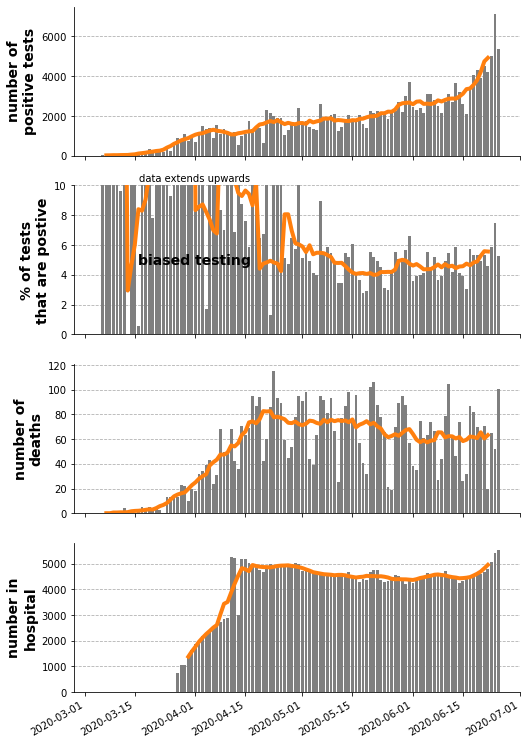

In [4]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(8,14), sharex=True)

ax[0].bar(CA['date'], CA['positiveIncrease'], color='C7')
ax[0].plot(CA['date'], CA['positiveIncrease_avg'], c='C1', lw=4)
ax[0].set_ylabel('number of\npositive tests', fontsize=14, fontweight='bold')

ax[1].bar(CA['date'], (CA['positiveIncrease']/CA['totalTestResultsIncrease'])*100, color='C7')
ax[1].plot(CA['date'], (CA['positiveIncrease_avg']/CA['totalTestResultsIncrease_avg'])*100, color='C1', lw=4)
ax[1].set_ylim(0, 10)
ax[1].set_ylabel('% of tests\nthat are postive', fontsize=14, fontweight='bold')
ax[1].text(0.27, 1.05, 'data extends upwards', fontsize=10,
           horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes)
ax[1].text(0.27, 0.5, 'biased testing', fontsize=14, fontweight='bold',
           horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes)

ax[2].bar(CA['date'], CA['deathIncrease'], color='C7')
ax[2].plot(CA['date'], CA['deathIncrease_avg'], c='C1', lw=4)
ax[2].set_ylabel('number of\ndeaths', fontsize=14, fontweight='bold')

ax[3].bar(CA['date'], CA['hospitalizedCurrently'], color='C7')
ax[3].plot(CA['date'], CA['hospitalizedCurrently_avg'], c='C1', lw=4)
ax[3].set_ylabel('number in\nhospital', fontsize=14, fontweight='bold')

for i in range(4):
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].yaxis.grid(ls='--')
    ax[i].set_axisbelow(True)

fig.autofmt_xdate()
plt.savefig('COVID-plot.jpg', dpi=300, bbox_inches='tight')
plt.show(fig)

In [5]:
print('% of infected dead = {:.1f}'.format((CA['death'][0] / CA['positive'][0]) * 100))

% of infected dead = 2.9
